In [2]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is B233-0680

 Directory of C:\data science

07-11-2023  19:02    <DIR>          .
06-11-2023  09:18    <DIR>          .ipynb_checkpoints
31-10-2023  15:40           119,042 100-pandas-puzzles-with-solutions.ipynb
30-10-2023  10:36            50,963 100-pandas-puzzles.ipynb
19-10-2023  21:44           540,200 amazon_laptop_prices_v01.csv
22-08-2023  09:02               556 anscombe.csv
12-10-2023  11:12               303 archive (1).zip
12-10-2023  11:14             7,438 archive (2).zip
12-10-2023  20:00            22,170 archive (3).zip
12-10-2023  11:14            16,570 archive (4).zip
12-10-2023  11:15            74,370 archive (5).zip
12-10-2023  11:15         9,277,600 archive (6).zip
12-10-2023  11:17            83,276 archive (7).zip
12-10-2023  11:17             5,575 archive (8).zip
12-10-2023  11:13               252 archive.zip
24-10-2023  19:07           698,670 assigned task JISHNU CR.ipynb
07-11-2023  19:02           6

In [3]:
import pandas as pd
import numpy as np


In [4]:
chern=pd.read_csv("cherndata.csv")

In [5]:
chern=chern.set_index("RowNumber")

What is the overall churn rate in the dataset, and how does it compare to industry benchmarks?

In [6]:
#a chern defines here is that a customer who stoped their bank services and no longer engaged with the bank in a logical way

In [7]:
#so first find the customers who are exited from the bank

In [8]:
chern["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

2037 is the total number of exited customers

In [9]:
#to find the the churn 
#eqn=(total no of churned customer / total no of customers)*100

In [10]:
(2037/10000)*100

20.369999999999997

20.36 is the churn rate

when it compared to industry benchmarks it has a low churn rate

2.Can you identify any significant differences in spending patterns between churned and nonchurned customers using measures of central tendency?

churned customer = 2037
non-churned customer = 7963

In [11]:
chern["Exited"].describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

In [12]:
np.mean(chern["Exited"]==0)#which means an average value of exited members

0.7963

In [13]:
(chern["Exited"]).mode()#so most repeated value is 0 , exited members are more

0    0
Name: Exited, dtype: int64

In [14]:
np.mean(chern["Exited"]==1)

0.2037

In [15]:
(chern["Exited"]==1).value_counts()

False    7963
True     2037
Name: Exited, dtype: int64

3.What is the dispersion in customer tenure for both churned and non-churned customers, and 
how does this affect the predictive modeling process?

In [16]:
chern["Tenure"].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [17]:
chern

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [18]:
#tenure defines the duration of the customers?
#here the duration is considerd in years because its a bank customer data

In [19]:
exited_group=chern.groupby("Exited")

In [20]:
not_exited=exited_group.get_group(0)

In [21]:
exited=exited_group.get_group(1)

In [22]:
exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [23]:
chern

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [24]:
exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [25]:
not_exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0


In [26]:
exited["Tenure"].value_counts()

1     232
3     213
9     213
5     209
4     203
2     201
8     197
6     196
7     177
10    101
0      95
Name: Tenure, dtype: int64

In [27]:
not_exited["Tenure"].value_counts()

7     851
2     847
8     828
1     803
5     803
3     796
4     786
6     771
9     771
10    389
0     318
Name: Tenure, dtype: int64

In [28]:
exited["Tenure"].var()

8.620720019520968

In [29]:
not_exited["Tenure"].var()

8.298189033852086

In [30]:
exited["Tenure"].std()

2.936106268431197

In [31]:
not_exited["Tenure"].std()

2.8806577432683818

measure of dispersion is slightly bigger when compare to not exited people 

4- How does feature scaling works on top of different features work with different techniques such 
as min-max,norm,standardization and interpret how each of them worked?

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
tenure_data=np.array(chern["Tenure"])

In [34]:
tenure_data

array([2, 1, 8, ..., 7, 3, 4], dtype=int64)

In [35]:
scaler=MinMaxScaler()

In [36]:
scaled_tenure=scaler.fit_transform(tenure_data)
print(scaled_tenure)

ValueError: Expected 2D array, got 1D array instead:
array=[2. 1. 8. ... 7. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
tenure_data=tenure_data.reshape(-1, 1)

standardization

In [37]:
sc=chern.loc[:,["CreditScore","Balance"]]

In [38]:
chern.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [39]:
sc

,CreditScore,Balance
RowNumber,,
1,619,0.00
2,608,83807.86
3,502,159660.80
4,699,0.00
5,850,125510.82
...,...,...
9996,771,0.00
9997,516,57369.61
9998,709,0.00


In [40]:
from sklearn.preprocessing import normalize

In [41]:
norm_credit=normalize(sc)

In [42]:
norm_credit

array([[1.        , 0.        ],
       [0.0072545 , 0.99997369],
       [0.00314415, 0.99999506],
       ...,
       [1.        , 0.        ],
       [0.01028246, 0.99994713],
       [0.00608551, 0.99998148]])

application of standardization

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = preprocessing.StandardScaler()

NameError: name 'preprocessing' is not defined

In [45]:
scaled_data = StandardScaler().fit_transform(sc)

In [46]:
scaled_data

array([[-0.32622142, -1.22584767],
       [-0.44003595,  0.11735002],
       [-1.53679418,  1.33305335],
       ...,
       [ 0.60498839, -1.22584767],
       [ 1.25683526, -0.02260751],
       [ 1.46377078,  0.85996499]])

In [47]:
data=pd.DataFrame(scaled_data,columns=sc.columns)

In [48]:
data

,CreditScore,Balance
0,-0.326221,-1.225848
1,-0.440036,0.117350
2,-1.536794,1.333053
3,0.501521,-1.225848
4,2.063884,0.785728
...,...,...
9995,1.246488,-1.225848
9996,-1.391939,-0.306379
9997,0.604988,-1.225848
9998,1.256835,-0.022608


In [49]:
data.loc[:100,:]

,CreditScore,Balance
0,-0.326221,-1.225848
1,-0.440036,0.117350
2,-1.536794,1.333053
3,0.501521,-1.225848
4,2.063884,0.785728
...,...,...
96,1.267182,0.422179
97,1.691400,0.330167
98,0.615335,-1.225848
99,-2.457657,-1.225848


In [50]:
data.loc[0]

CreditScore   -0.326221
Balance       -1.225848
Name: 0, dtype: float64

5- Can you visualize the distribution of customer demographics such as age, income, and location 
for churned and non-churned customers using histograms or density plots?

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x140cd34d810>,
 'caps': [<matplotlib.lines.Line2D at 0x140cd34dd50>,
 'boxes': [<matplotlib.lines.Line2D at 0x140cd34d570>],
 'medians': [<matplotlib.lines.Line2D at 0x140cd34e290>],
 'fliers': [<matplotlib.lines.Line2D at 0x140cd34e530>],
 'means': []}

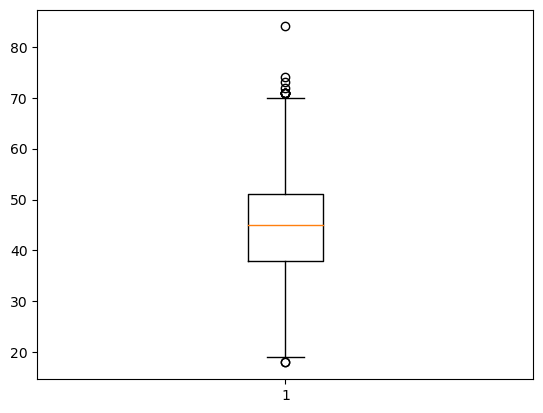

In [52]:
plt.boxplot(exited["Age"])

- an average age of exited people is 40 - 50

In [53]:
exited["Age"].max()

84

In [54]:
exited["Age"].min()

18

- outlayers are coming above age 70 and below 20


C:\Users\91994\AppData\Local\Temp\ipykernel_5792\2010668207.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exited["Age"])


<Axes: xlabel='Age', ylabel='Density'>

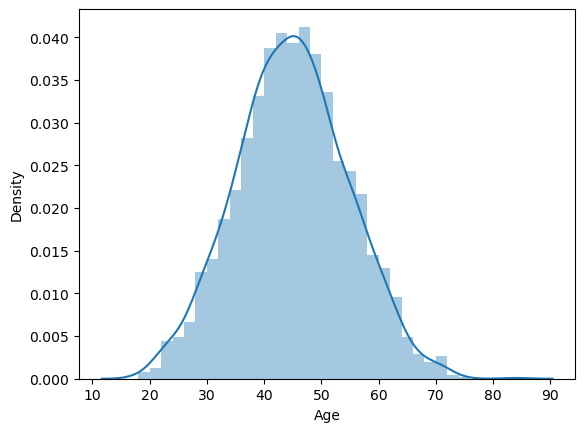

In [55]:
sns.distplot(exited["Age"])

- higher density is coming between 40-50 as i mentioned before

C:\Users\91994\AppData\Local\Temp\ipykernel_5792\452709152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_exited["Age"])


<Axes: xlabel='Age', ylabel='Density'>

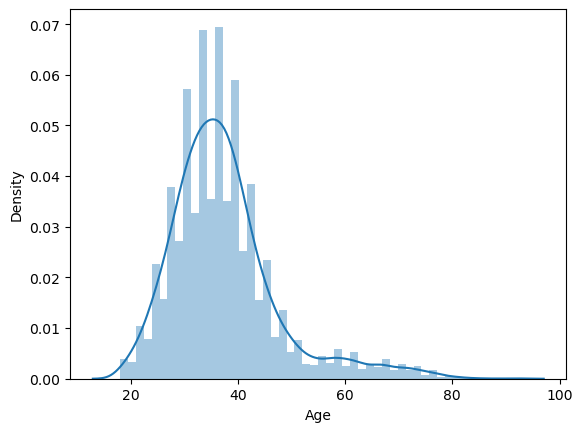

In [56]:
sns.distplot(not_exited["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x140cdbe5600>,
 'caps': [<matplotlib.lines.Line2D at 0x140cdbe5b40>,
 'boxes': [<matplotlib.lines.Line2D at 0x140cdbe5360>],
 'medians': [<matplotlib.lines.Line2D at 0x140cdbe6080>],
 'fliers': [<matplotlib.lines.Line2D at 0x140cdbe6320>],
 'means': []}

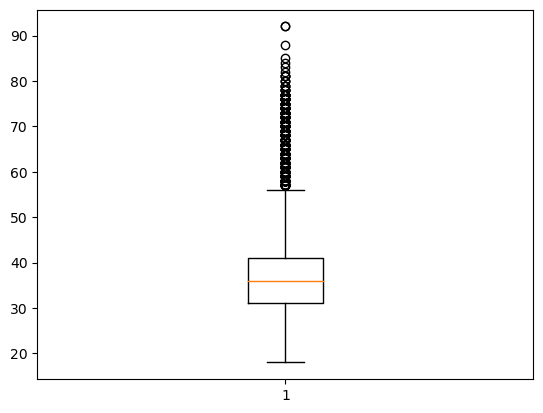

In [57]:
plt.boxplot(not_exited["Age"])

In [58]:
exited.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x140cdc5db10>,
 'caps': [<matplotlib.lines.Line2D at 0x140cdc5e050>,
 'boxes': [<matplotlib.lines.Line2D at 0x140cdc5d870>],
 'medians': [<matplotlib.lines.Line2D at 0x140cdc5e590>],
 'fliers': [<matplotlib.lines.Line2D at 0x140cdc5e830>],
 'means': []}

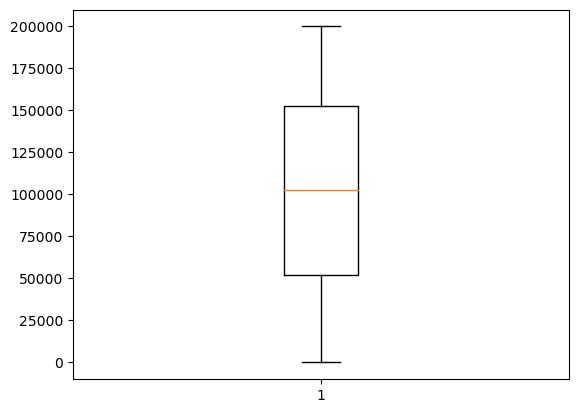

In [59]:
plt.boxplot(exited["EstimatedSalary"])

-an average salry of a person is 1 lack per annum


-there are no outliers which means there is no falling apart from the expected range

C:\Users\91994\AppData\Local\Temp\ipykernel_5792\429202072.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exited["EstimatedSalary"])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

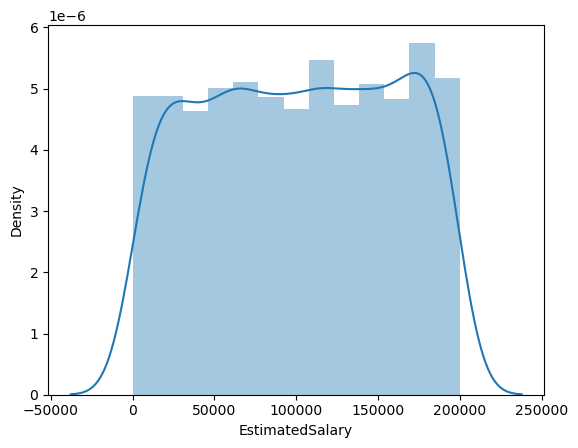

In [60]:
sns.distplot(exited["EstimatedSalary"])

In [61]:
not_exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0


ValueError: Grouper and axis must be same length

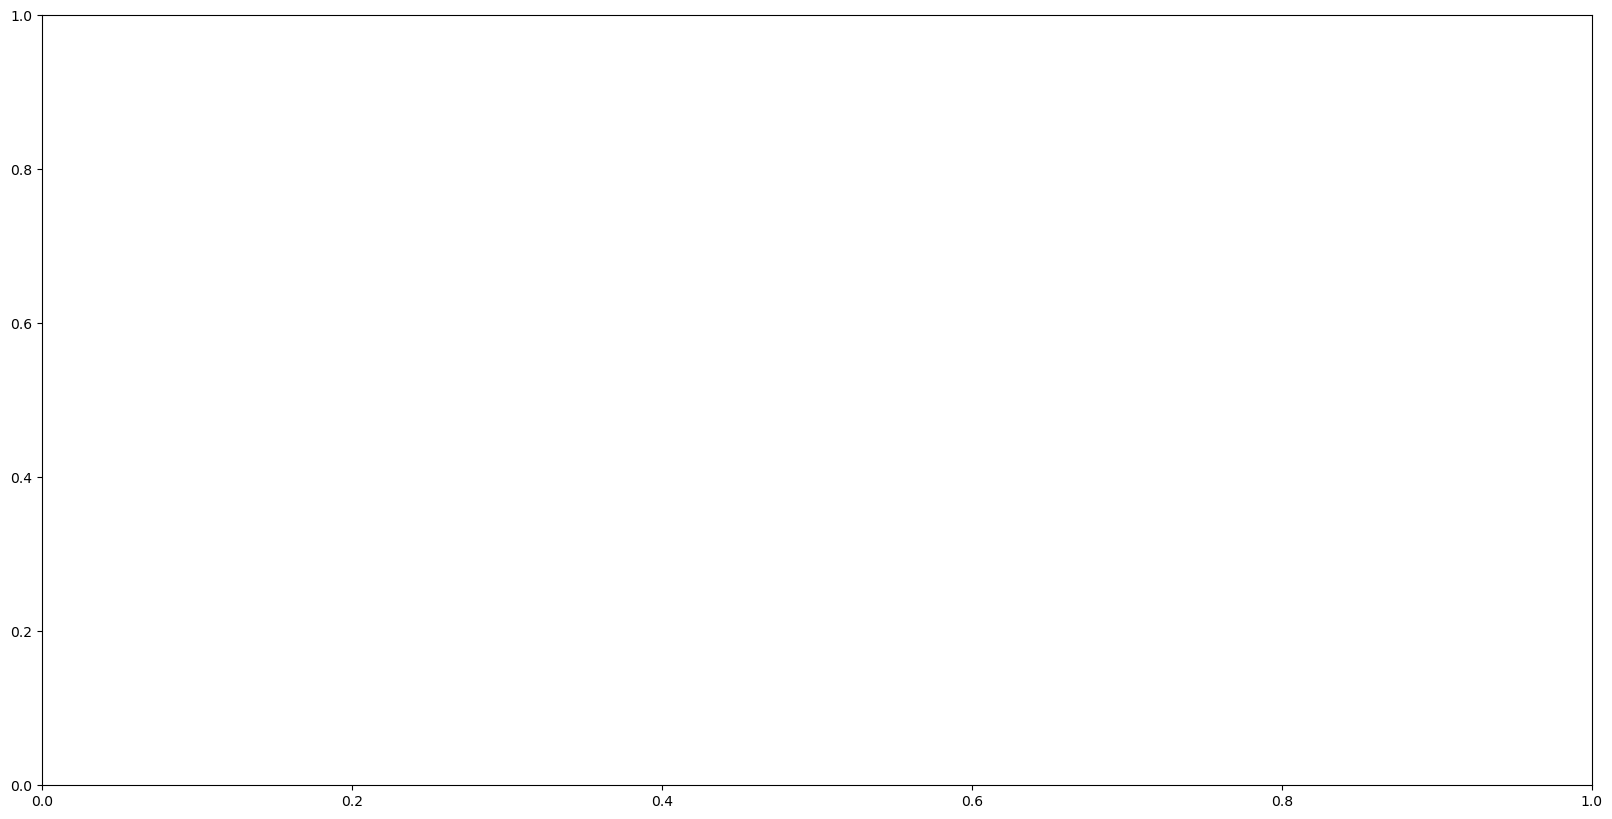

In [62]:
plt.subplots(figsize=(20,10))
sns.barplot(x=not_exited['Age'].value_counts()[:20].index, y=not_exited['CreditScore'])
plt.title('non_churned_countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
exited["EstimatedSalary"].max()

In [ ]:
exited["EstimatedSalary"].min()

In [ ]:
plt.boxplot(not_exited["EstimatedSalary"])

In [ ]:
sns.distplot(not_exited["EstimatedSalary"])

In [ ]:
exited

- not exited customers is also having the same range as the exited customers compared to estimated salary

In [ ]:
exited.boxplot(by="Geography",column="EstimatedSalary")

In [ ]:
not_exited.boxplot(by="Geography",column="EstimatedSalary")

In [ ]:
not_exited["Geography"].value_counts()

- when compared to the non churned customers french people has the most number of salaries
- german people has the least number of salaries


<Axes: title={'center': 'Age'}, xlabel='Geography'>

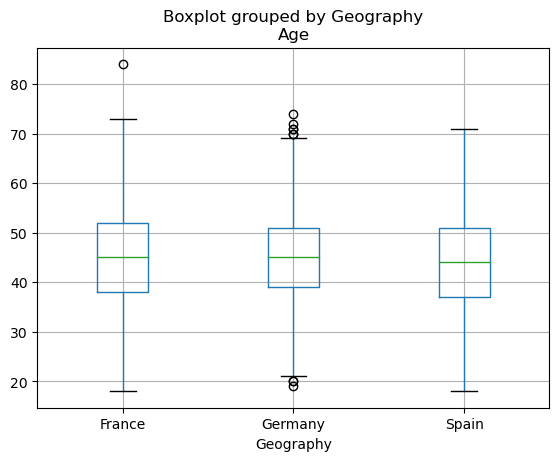

In [63]:
exited.boxplot(by="Geography",column="Age")

<Axes: title={'center': 'Age'}, xlabel='Geography'>

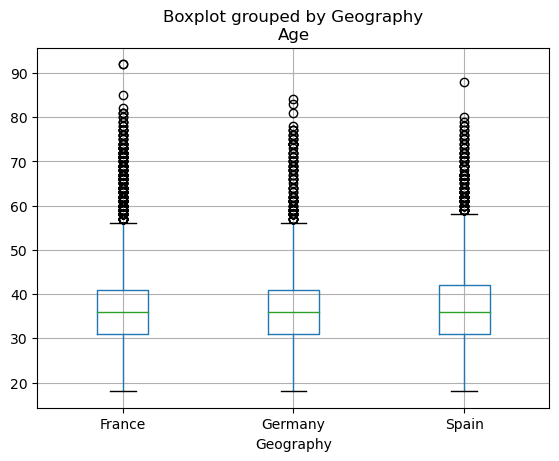

In [64]:
not_exited.boxplot(by="Geography",column="Age")

-by looking at both the churned and non churnde boxplot we can understand that 
- in churned data with comparation of age and location the most symmetric and location without measure of spread is spain
and with most spreaded location is germany
- and in non churned data set there is wide range of spread when compared to the churned data in three locations


**6- Is there a significant correlation between customer satisfaction scores and the likelihood of 
churn, and how does this influence the development of churn prediction models?**

In [65]:
chern.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [66]:
corr_exited=exited.corr()

C:\Users\91994\AppData\Local\Temp\ipykernel_5792\2496950372.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_exited=exited.corr()


In [67]:
corr_exited["CreditScore"].sort_values(ascending=False)

CreditScore        1.000000
Tenure             0.027727
Balance            0.017386
NumOfProducts      0.000432
IsActiveMember    -0.000778
CustomerId        -0.001731
Age               -0.011033
HasCrCard         -0.012321
EstimatedSalary   -0.055129
Exited                  NaN
Name: CreditScore, dtype: float64

**7- What are the key features that exhibit the highest variability between churned and non-churned 
customers, and how can you leverage this information for feature selection?**

In [68]:
exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [69]:
churn_age_std=exited["Age"].std()
churn_age_mean=exited["Age"].mean()
nonchurn_age_std=not_exited["Age"].std()
nonchurn_age_mean=not_exited["Age"].mean()

In [70]:
churn_age_cv=churn_age_std/churn_age_mean
non_churn_age_cv=nonchurn_age_std/nonchurn_age_mean

In [71]:
print(f'The coefficient of variation of churn age: {churn_age_cv}')
print(f'The coefficient of variation of non churned age: {non_churn_age_cv}')

The coefficient of variation of churn age: 0.2177073508355836
The coefficient of variation of non churned age: 0.2706709173087161


- non churned customers have more coefficient of variation than churned customers
- it defines that non churned customers are orderless and deviated from the average

In [72]:
#lets do it with the estimated salary

In [73]:
churn_salary_std=exited["EstimatedSalary"].std()
churn_salary_mean=exited["EstimatedSalary"].mean()
nonchurn_salary_std=not_exited["EstimatedSalary"].std()
nonchurn_salary_mean=not_exited["EstimatedSalary"].mean()

In [74]:
churn_salary_cv=churn_salary_std/churn_salary_mean
nonchurn_salary_cv=nonchurn_salary_std/nonchurn_salary_mean

In [75]:
print(f'The coefficient of variation of churn salary: {churn_salary_cv}')
print(f'The coefficient of variation of non churned salary: {nonchurn_salary_cv}')

The coefficient of variation of churn salary: 0.5707586987066327
The coefficient of variation of non churned salary: 0.5755615861274767


- so the non churned and churn customers has the same range of cv which implies they both having an ordered data with least number of outliers

**8- Are there any outliers in the dataset that could potentially skew the results of the churn 
prediction model, and how should you handle these outliers?**

In [76]:
exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


{'whiskers': [<matplotlib.lines.Line2D at 0x140d1871570>,
 'caps': [<matplotlib.lines.Line2D at 0x140d1871ab0>,
 'boxes': [<matplotlib.lines.Line2D at 0x140d18712d0>],
 'medians': [<matplotlib.lines.Line2D at 0x140d1871ff0>],
 'fliers': [<matplotlib.lines.Line2D at 0x140d1872290>],
 'means': []}

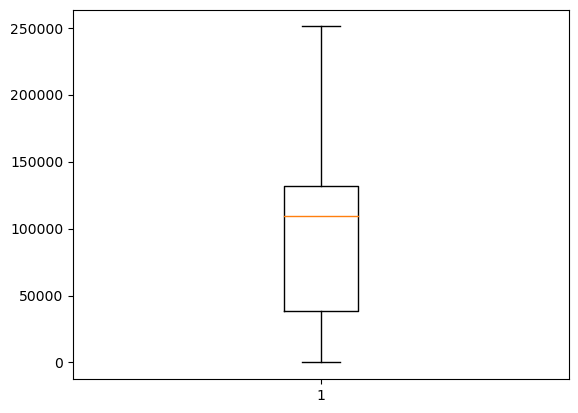

In [77]:
plt.boxplot(exited["Balance"])

C:\Users\91994\AppData\Local\Temp\ipykernel_5792\429202072.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exited["EstimatedSalary"])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

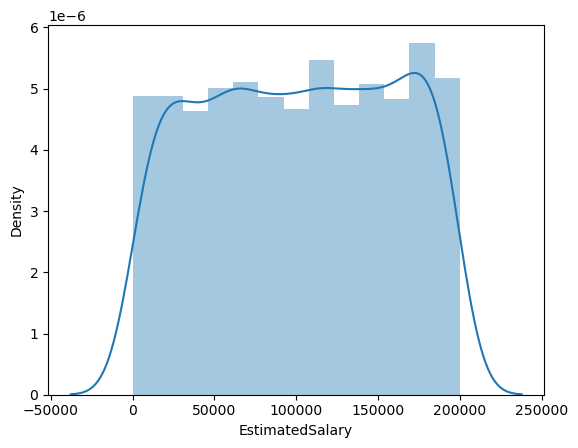

In [78]:
sns.distplot(exited["EstimatedSalary"])

C:\Users\91994\AppData\Local\Temp\ipykernel_5792\2010668207.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exited["Age"])


<Axes: xlabel='Age', ylabel='Density'>

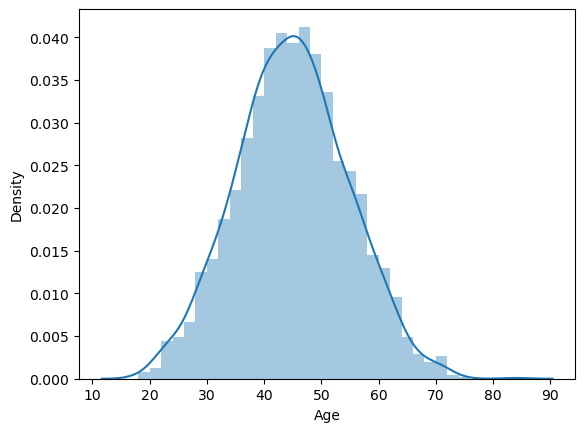

In [79]:
sns.distplot(exited["Age"])

C:\Users\91994\AppData\Local\Temp\ipykernel_5792\814462390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exited["CreditScore"])


<Axes: xlabel='CreditScore', ylabel='Density'>

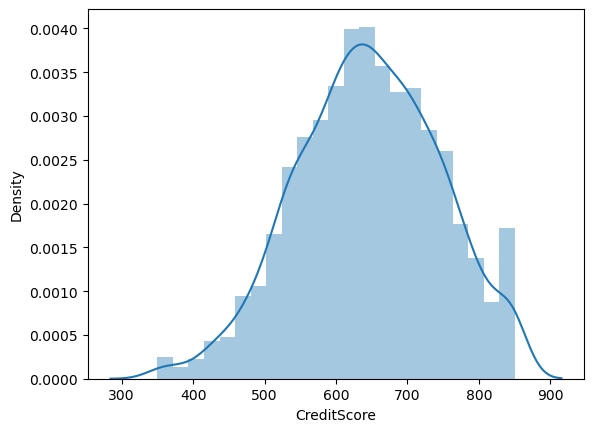

In [80]:
sns.distplot(exited["CreditScore"])

- it is a left skewed feature

**8- Are there any outliers in the dataset that could potentially skew the results of the churn 
prediction model, and how should you handle these outliers?**


In [81]:
!pip install scikit-learn

In [82]:
from sklearn import preprocessing 

In [83]:
salary_norm=preprocessing.normalize([exited["EstimatedSalary"]])

In [84]:
salary_norm

array([[0.01922194, 0.02160838, 0.02840302, ..., 0.01315958, 0.007982  ,
        0.01761733]])

by normalizing the salary feature we can detect the outliers

C:\Users\91994\AppData\Local\Temp\ipykernel_5792\2992960913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_norm)


<Axes: ylabel='Density'>

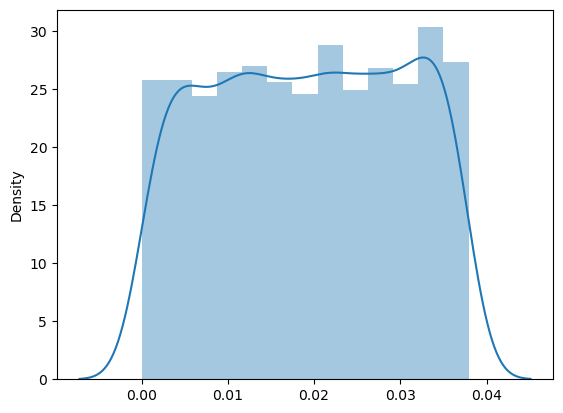

In [85]:
sns.distplot(salary_norm)

**9- What is the distribution of customer churn across different demographic segments such as age 
groups, income levels, and geographical locations, and how does this influence the development 
of targeted retention strategies?**


In [86]:
exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [87]:
exited["NumOfProducts"].value_counts()

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

In [88]:
new_age = not_exited[(not_exited['Age'] >= 20) & (not_exited['Age'] <= 30)]

In [89]:
new_age

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
14,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0
18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0
20,15568982,Hao,726,France,Female,24,6,0.00,2,1,1,54724.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15589329,Pirozzi,775,France,Male,30,4,0.00,2,1,0,49337.84,0
9990,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0
9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0


In [90]:
new_age["Geography"].value_counts()

France     966
Spain      424
Germany    384
Name: Geography, dtype: int64

In [91]:
new_age["Tenure"].value_counts()

8     208
4     204
7     201
3     180
2     177
1     175
6     163
5     162
9     155
10     88
0      61
Name: Tenure, dtype: int64

-by finding the age between 20 to 30 is that the most people are started account in this ages and so they cannot be churned suddenly

**10- What is the range of customer satisfaction scores among churned customers, and how does this 
range compare to that of retained customers, indicating potential areas for improvement in 
service quality and customer experience**

In [92]:
exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [93]:
exited["IsActiveMember"].value_counts()

0    1302
1     735
Name: IsActiveMember, dtype: int64

- 1302 customers are not active members , this can be taken as the reason for churning


In [94]:
exited["NumOfProducts"].value_counts()

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

In [95]:
348+220+60

628

- around 628 persons are engaged in banks services like bank loans,credit card services,loans ,investment accounts etc
- the number of products column refers to that type of analysing

by considering all these data the satisfaction rate  can be consider as dissatisfied under 1 to 10 scale

In [96]:
not_exited["IsActiveMember"].value_counts()

1    4416
0    3547
Name: IsActiveMember, dtype: int64

In [97]:
not_exited["NumOfProducts"].value_counts()

2    4242
1    3675
3      46
Name: NumOfProducts, dtype: int64

people whor are not churned is widely better than comparing them with churned cutomers

**11- What is the correlation between the timing of customer interactions, such as the frequency of 
product usage or customer service contacts, and the likelihood of churn, and how can this 
information be leveraged to develop proactive customer retention interventions?**

In [98]:
exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [110]:
exited["Tenure"]["NumOfProducts"]

KeyError: 'NumOfProducts'

(array([504.,  22.,  80., 226., 559., 428., 156.,  43.,  17.,   2.]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

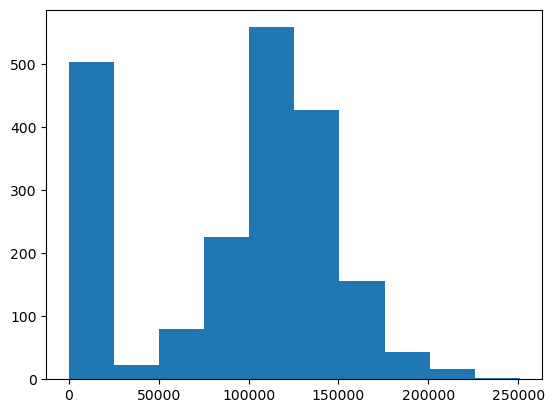

In [113]:
plt.hist(exited["Balance"])

In [ ]:
heat=global_terror1.pivot_table(index='Country',columns='Year',values='Casualities')
heat.fillna(0,inplace=True)

In [114]:
# churned customers with theyre duration
churn_1 = exited.sort_values(by='NumOfProducts',ascending=False) 


In [118]:
data=churn_1.pivot_table(index='Geography',columns='Tenure',values='NumOfProducts')
data.fillna(0,inplace=True)

In [119]:
data

Tenure,0,1,2,3,4,5,6,7,8,9,10
Geography,,,,,,,,,,,
France,1.485714,1.433735,1.511111,1.469880,1.423529,1.381579,1.337662,1.565789,1.449275,1.568182,1.687500
Germany,1.333333,1.361905,1.562500,1.619048,1.289474,1.544444,1.486842,1.344262,1.517241,1.344086,1.619048
Spain,1.208333,1.522727,1.382979,1.826087,1.452381,1.744186,1.441860,1.550000,1.487805,1.375000,1.363636


**12- Are there any significant differences in the average account balances between churned and 
retained customers, and how do these differences impact the bank's revenue and customer 
retention strategies**

In [121]:
not_exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0


In [125]:
exited["EstimatedSalary"].mean()

101465.67753068237

In [126]:
not_exited["EstimatedSalary"].mean()

99738.39177194524

- churned customers has the most number of average salary

**13- What is the range and standard deviation of customer credit scores or loan repayment histories 
among churned and retained customers, and how can this information guide the bank's risk 
assessment and lending practices**

In [127]:
exited["CreditScore"].max()

850

In [128]:
exited["CreditScore"].min()

350

In [129]:
850-350

500

- 500 is the range of credit score in the group of churned customers

In [130]:
not_exited["CreditScore"].max()

850

In [131]:
not_exited["CreditScore"].min()

405

In [132]:
850-405

445

- 445 is the range of credit score in the group of non churned customers

**14- Calculate the Interquartile Range (IQR) for the customer age variable in the Bank Customer 
Churn Prediction dataset. Then, identify any potential outliers in the age distribution, and 
discuss how these outliers may impact the bank's understanding of its customer demographics 
and their likelihood of churning.**

In [133]:
q1 = np.quantile(exited['Age'],q=0.25)
q2 = np.quantile(exited['Age'],q=0.50)
q3 = np.quantile(exited['Age'],q=0.75)
q4 = np.quantile(exited['Age'],q=1)

In [134]:
print(f'First Quartile of Age: {q1} ')
print(f'Second Quartile of Age:{q2} ')
print(f'Third Quartile of Age:{q3} ')
print(f'Fourth Quartile of Age: {q4}')

First Quartile of Age: 38.0 
Second Quartile of Age:45.0 
Third Quartile of Age:51.0 
Fourth Quartile of Age: 84


- where the IQR can displayed as q3-q1

In [135]:
q3-q1

13.0

IQR = 13.0

{'whiskers': [<matplotlib.lines.Line2D at 0x140d7394f10>,
 'caps': [<matplotlib.lines.Line2D at 0x140d73954b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x140d7394c70>],
 'medians': [<matplotlib.lines.Line2D at 0x140d73959f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x140d7395c90>],
 'means': []}

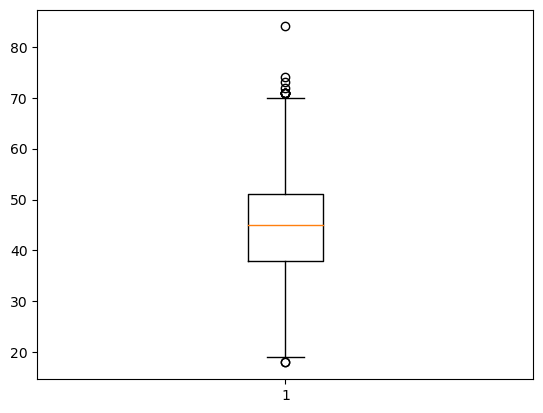

In [136]:
plt.boxplot(exited["Age"])

In [139]:
exited_age = preprocessing.normalize(exited["Age"])

ValueError: Expected 2D array, got 1D array instead:
array=[42. 42. 44. ... 53. 36. 42.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [140]:
scaler=preprocessing.StandardScaler()

In [142]:
scaled_age=scaler.fit_transform(exited["Age"] & not_exited["Age"])

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.